In [1]:
import pandas as pd

### Build DataFrame

In [10]:
df[(df.sum(axis=1) < 5) & (df.sum(axis=1) > 0)].T

,2011-02-28 00:00:00,2013-10-03 00:00:00,2013-11-12 00:00:00,2017-05-19 00:00:00,2017-09-16 00:00:00
everything went numb,0,0,0,0,0
that'll be the day,0,0,0,0,0
point / counterpoint,1,0,0,0,0
if and when we rise again,0,0,0,0,0
"a better place, a better time",0,0,0,0,0
we are the few,0,0,0,0,0
"failing, flailing",0,0,0,0,0
here's to life,0,0,0,0,0
a moment of silence,0,0,0,0,0
a moment of violence,0,0,0,0,0


https://www.setlist.fm/setlist/streetlight-manifesto/2013/waiting-room-buffalo-ny-13c7d159.html

In [11]:
trimmed = df[df.sum(axis=1) >= 7]

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Visualization

In [43]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from get_data import load_data

df = load_data()

trimmed = df[df.sum(axis=1) >= 7]

In [11]:
from viz import make_setlist_heatmap

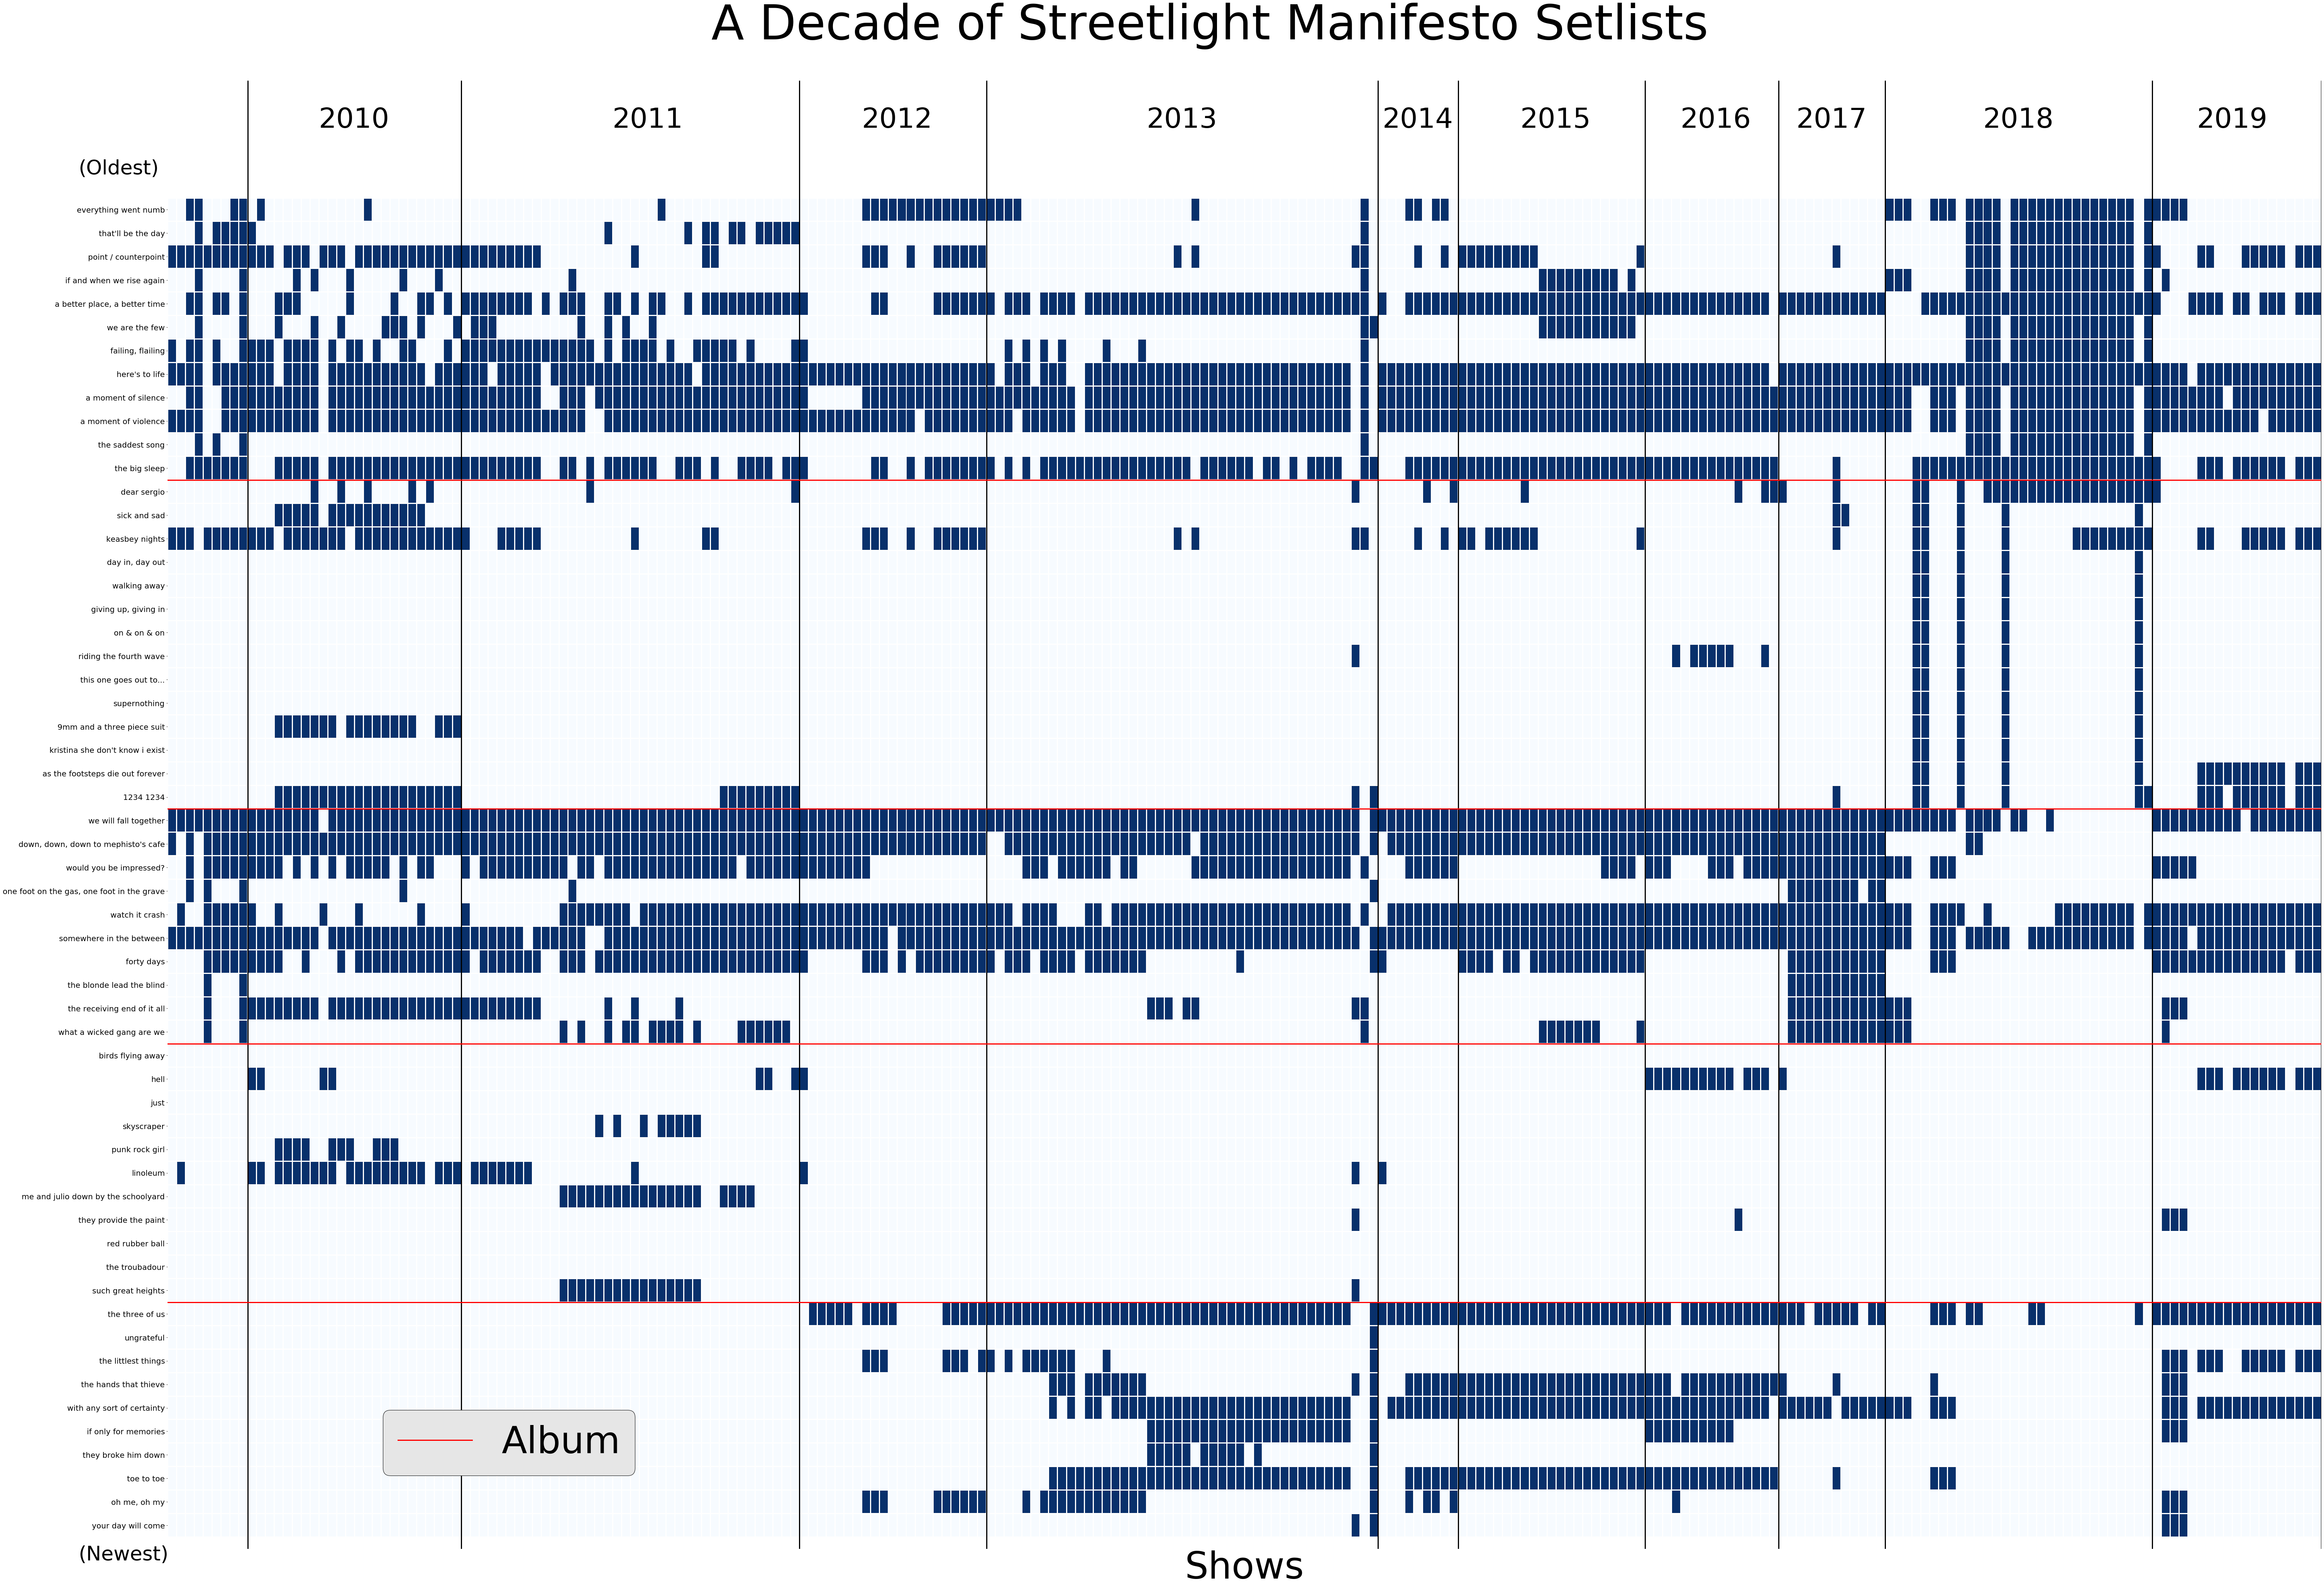

In [12]:
make_setlist_heatmap(trimmed);

In [117]:
from viz import make_setlist_heatmap, get_year_splits

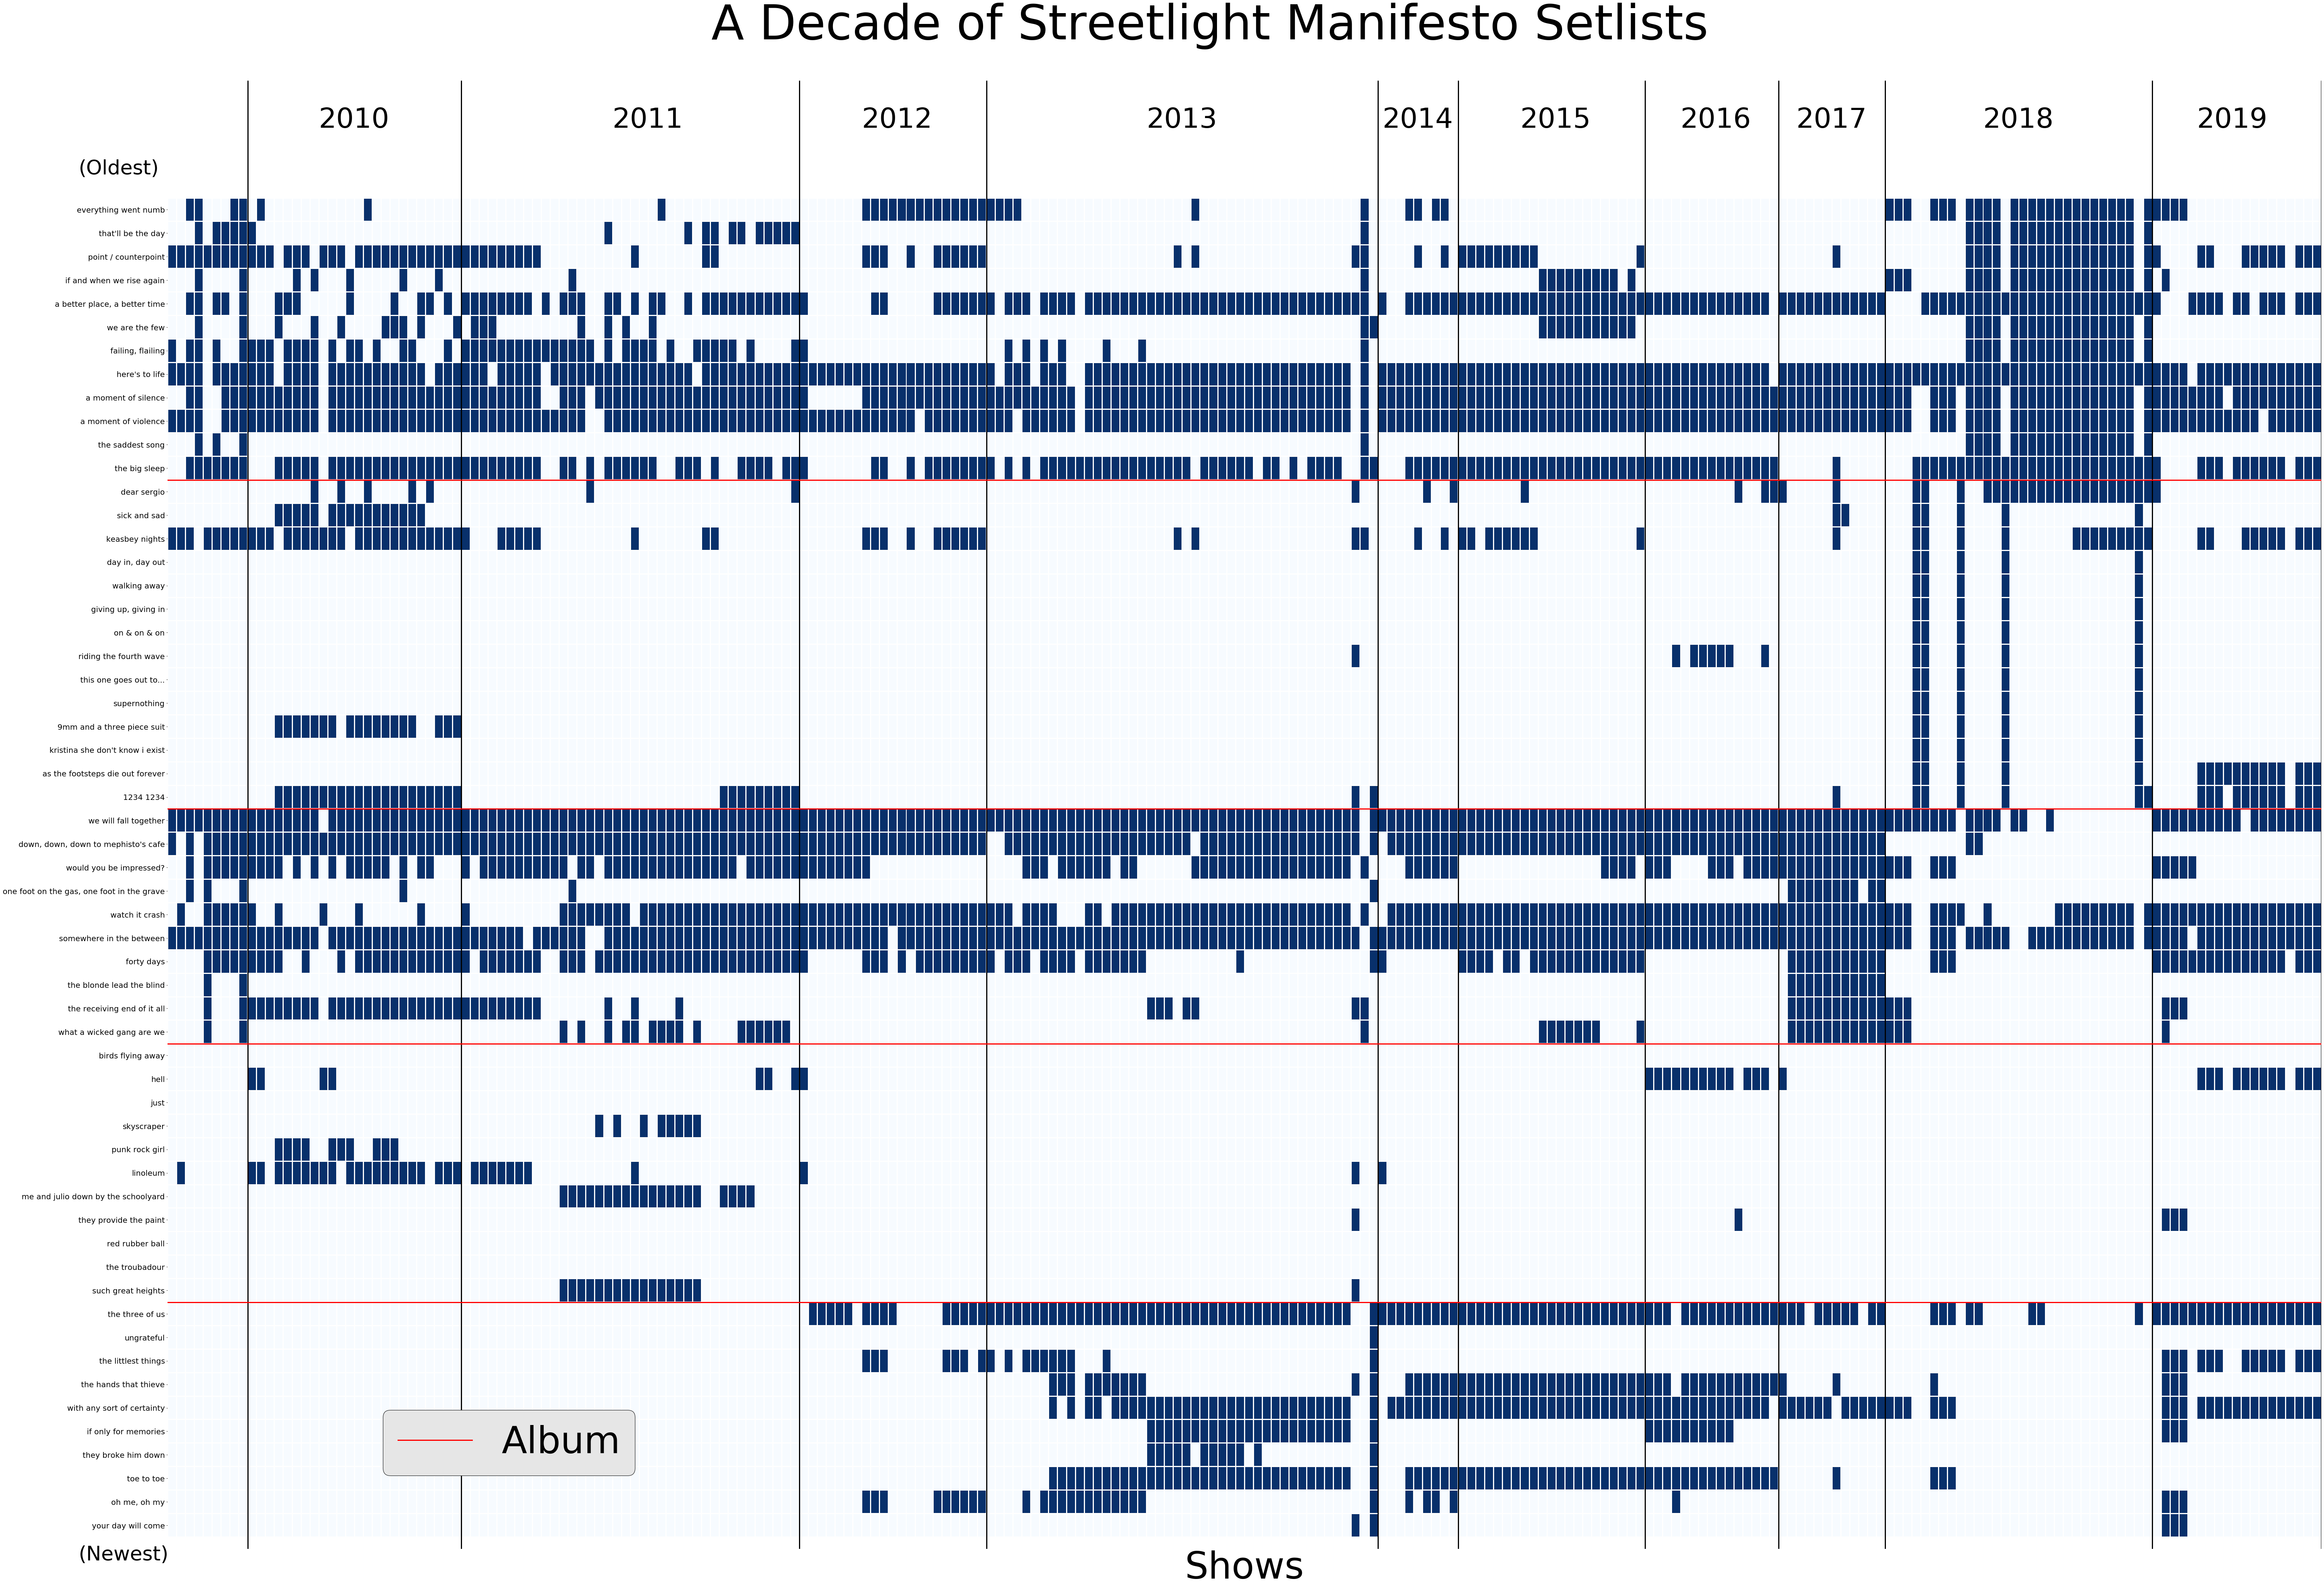

In [259]:
ax = make_setlist_heatmap(trimmed)

plt.savefig('with_year.png', quality=95, pad_inches='tight')

### Spot Checking

In [19]:
from viz import plot_all_time_plays

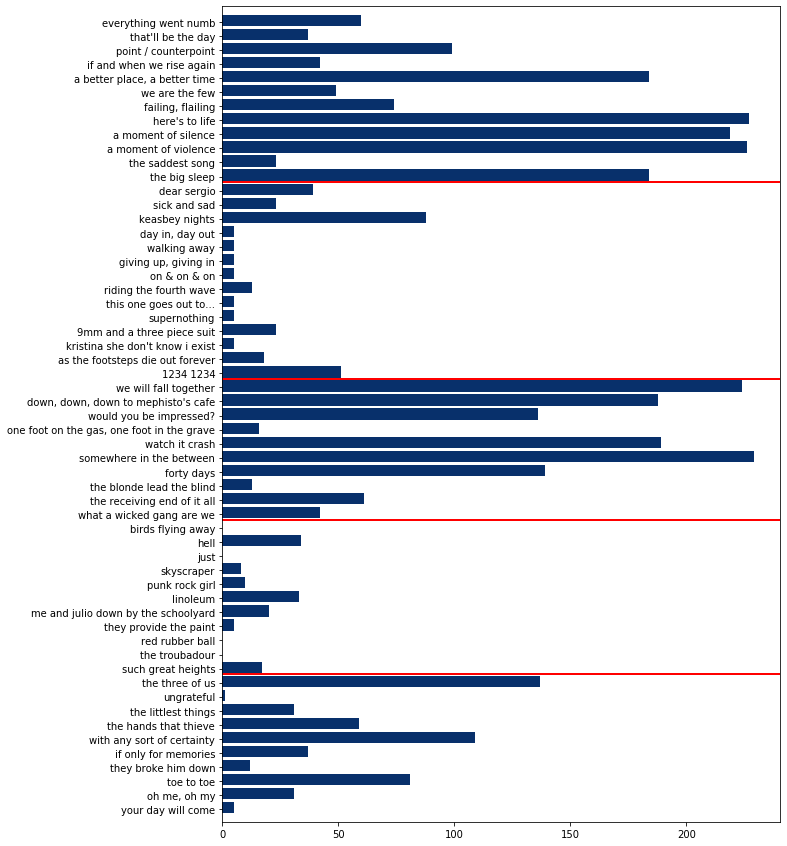

In [20]:
plot_all_time_plays(trimmed)

In [21]:
df[df['punk rock girl'] == 1]

,everything went numb,that'll be the day,point / counterpoint,if and when we rise again,"a better place, a better time",we are the few,"failing, flailing",here's to life,a moment of silence,a moment of violence,...,the three of us,ungrateful,the littlest things,the hands that thieve,with any sort of certainty,if only for memories,they broke him down,toe to toe,"oh me, oh my",your day will come
dates,,,,,,,,,,,,,,,,,,,,,
2010-06-23,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-06-24,0,0,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-06-26,0,0,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-06-27,0,0,1,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-01,0,0,1,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-02,0,0,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-03,0,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-20,0,0,1,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-21,0,0,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from viz import cooccurrence_heatmap

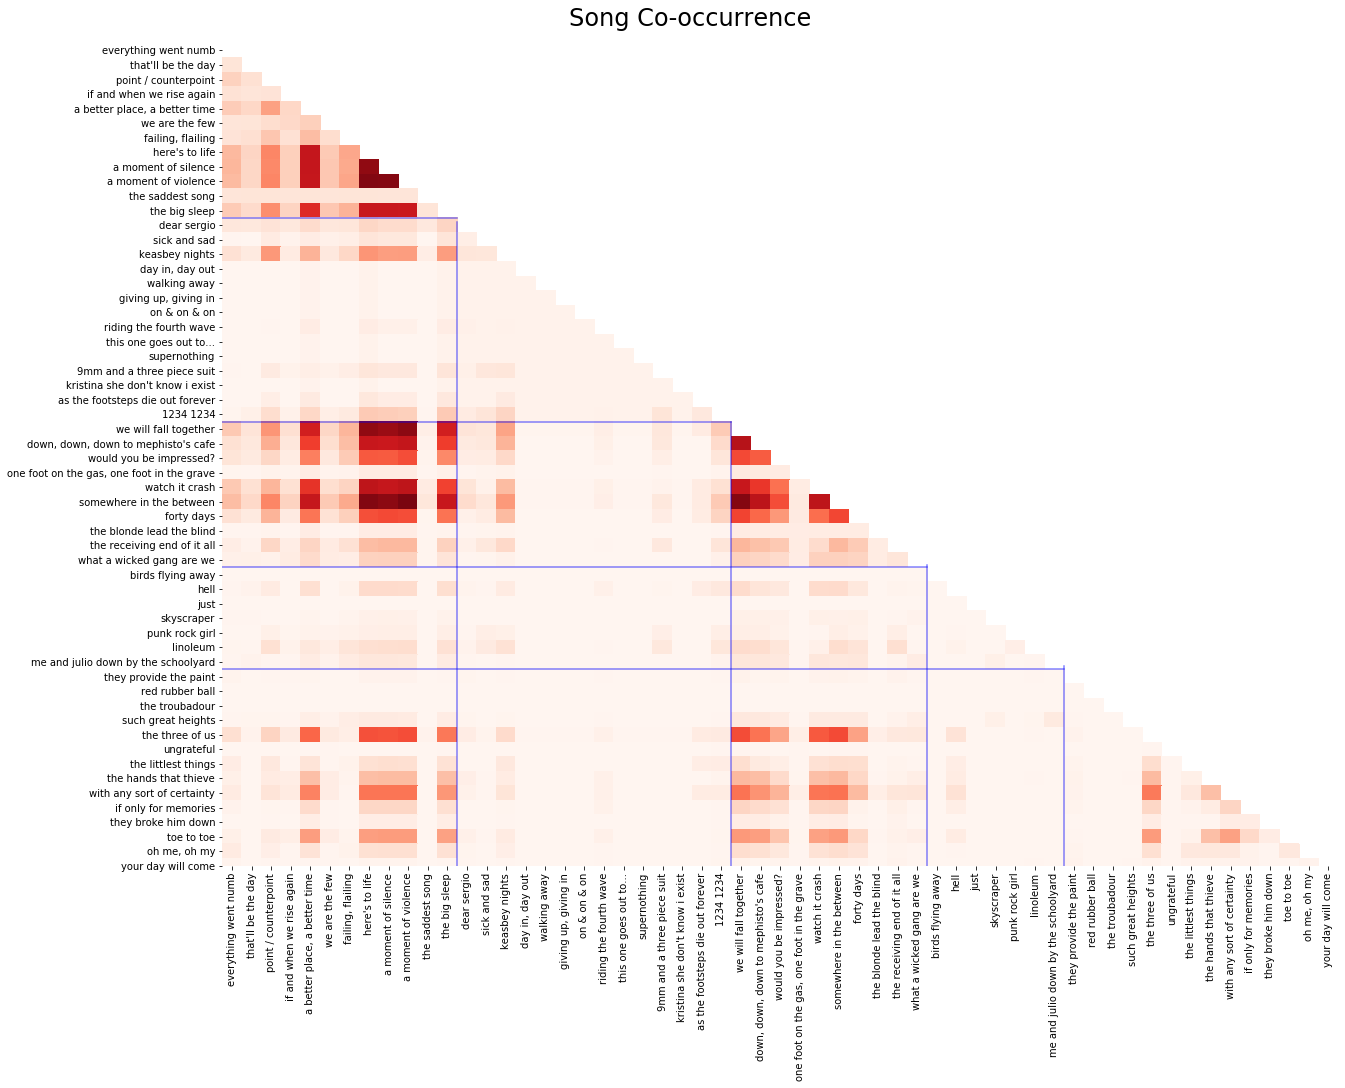

In [17]:
cooccurrence_heatmap(trimmed)

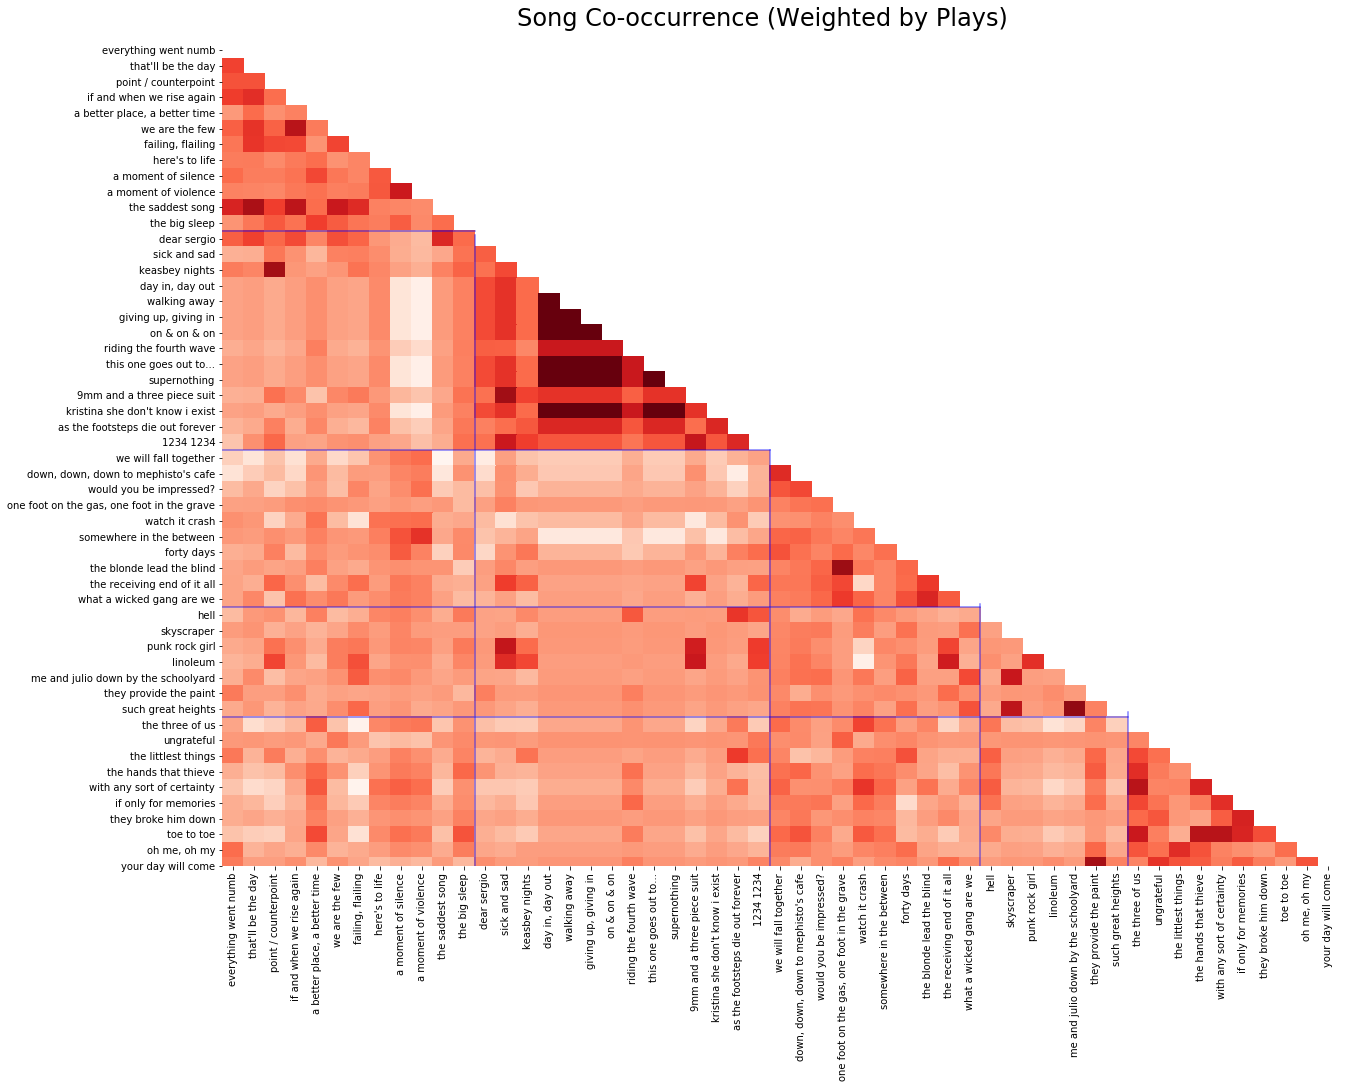

In [18]:
cooccurrence_heatmap(trimmed, play_weighted=True)

In [84]:
corr = trimmed.corr().dropna(how='all')

corr = corr[corr.index]

In [85]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

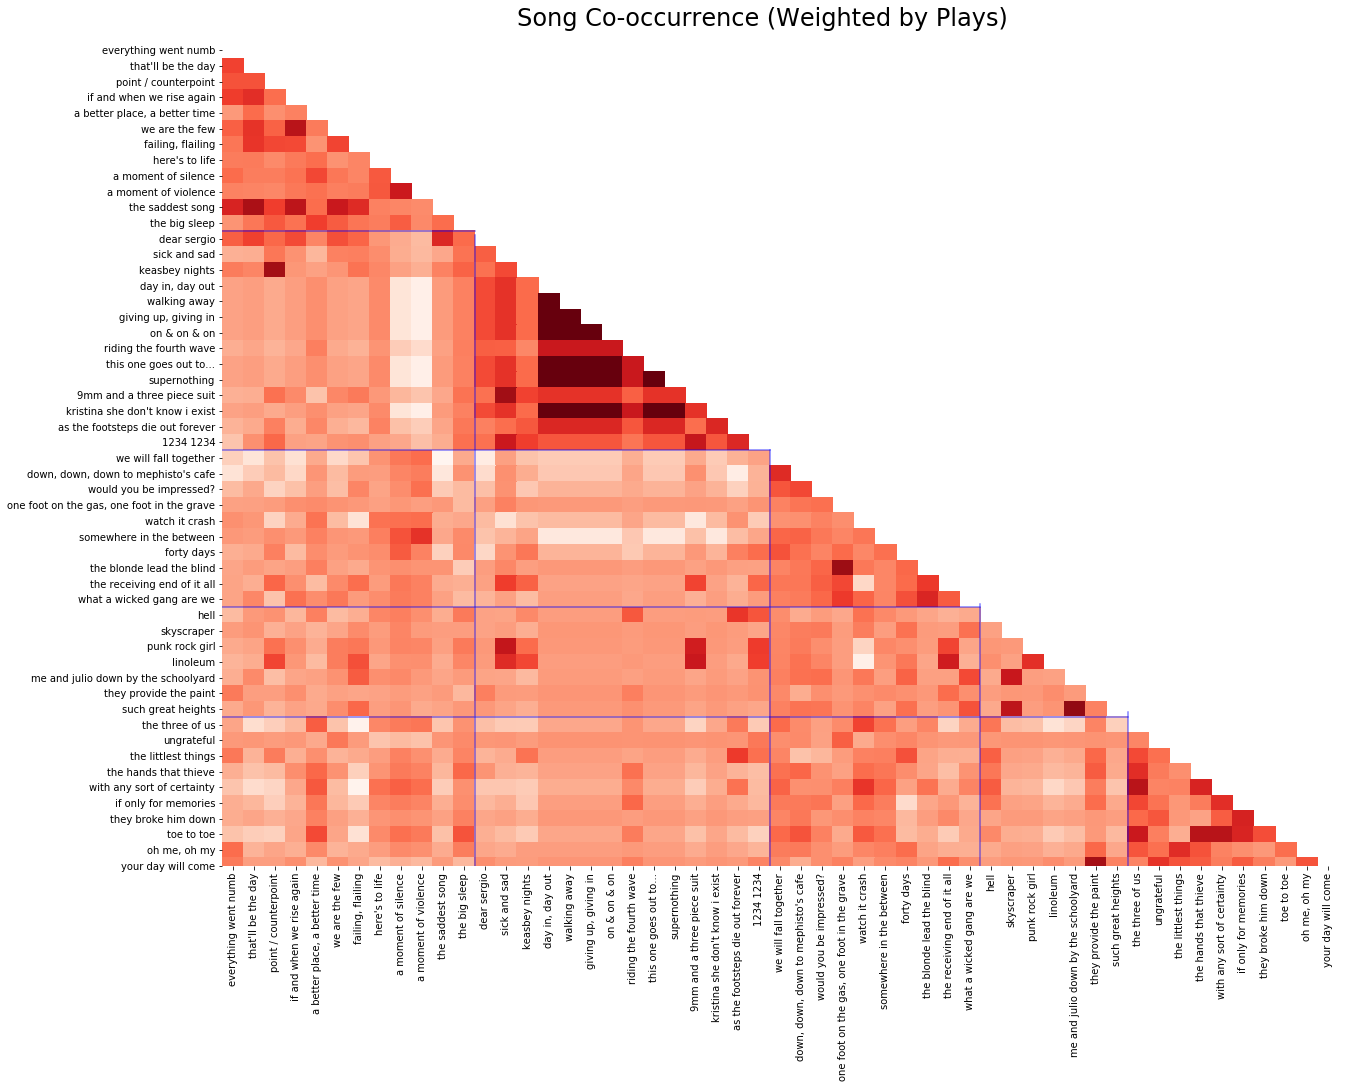

In [109]:
fig, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(corr, ax=ax, mask=mask, cmap='Reds',
            cbar=False);
fig.suptitle('Song Co-occurrence (Weighted by Plays)',
             x=.5, y=.92, fontsize=24);

indexes = [12, 26, 36, 43]

for idx in indexes:
    ax.axhline(idx, xmax=idx/len(corr), c='b', alpha=.5)
    ax.axvline(idx, ymax=(1 - idx/len(corr)), c='b', alpha=.5)